In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import keras

In [2]:
#!pip install tensorflow

In [3]:
print(f"Tensorflow Version{tf.__version__}")
#print(f"Keras Version{tf.keras.__version__}")
print(f"Keras Version {keras.__version__}")

Tensorflow Version2.15.0
Keras Version 2.15.0


In [4]:
os.getcwd()

'/content'

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [7]:
(X_train_full,y_train_full),(X_test,y_test)= mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test= X_test/255.


In [11]:
X_valid.shape,X_train.shape,y_valid.shape,y_train.shape,X_test.shape,y_test.shape

((5000, 28, 28), (55000, 28, 28), (5000,), (55000,), (10000, 28, 28), (10000,))

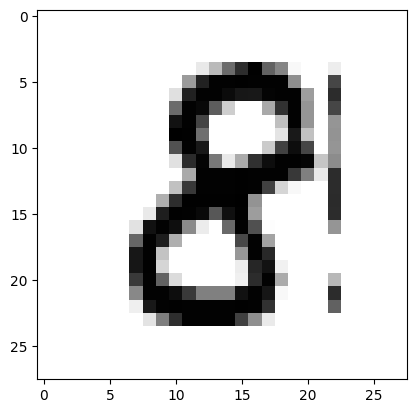

In [12]:
plt.imshow(X_train[9],cmap='binary')
plt.show()

<Axes: >

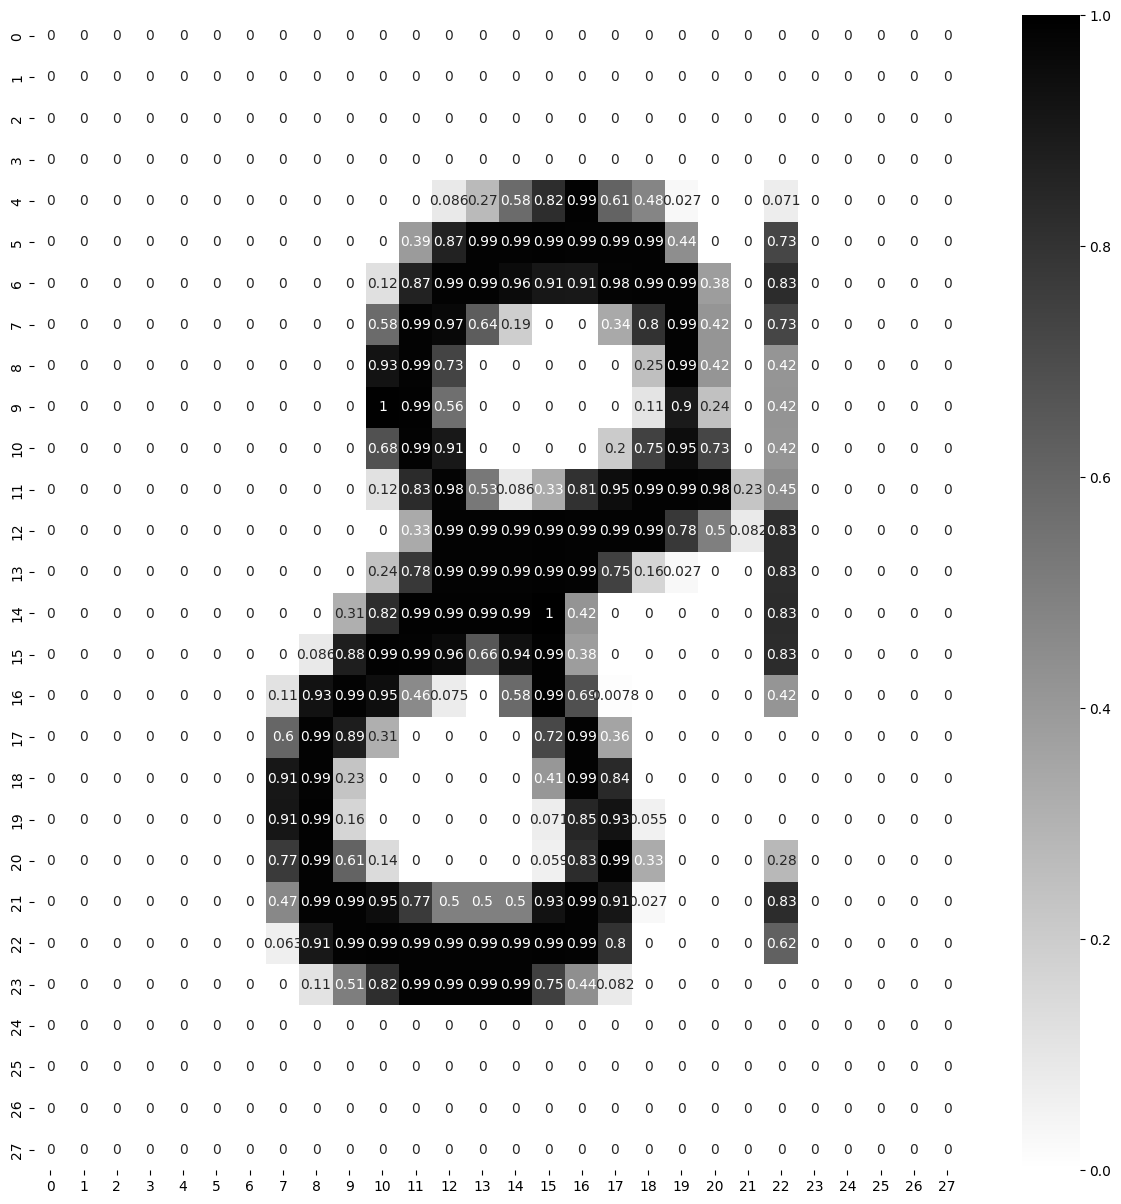

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[9],annot=True,cmap='binary')

In [14]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
          tf.keras.layers.Dense(300,activation='relu',name='HiddenLayer1'),
          tf.keras.layers.Dense(100,activation='relu',name='HiddenLayer2'),
          tf.keras.layers.Dense(10,activation='softmax', name='OutputLayer')]

model_clf = tf.keras.models.Sequential(layers=LAYERS)



In [15]:
model_clf.layers

In [16]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# first Layer * second Layer + bias
784*300+300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [18]:
sum((235500,30100,1010))

266610

In [19]:
layer1=model_clf.layers[1]

In [20]:
layer1.name

'HiddenLayer1'

In [21]:
len(layer1.get_weights()[1])

300

In [22]:
layer1.get_weights()

[array([[ 0.01961672, -0.02539296, -0.06987253, ...,  0.05305658,
         -0.07212905, -0.03312833],
        [ 0.03039108,  0.03323662, -0.05280809, ...,  0.01526057,
          0.06917703,  0.01890403],
        [-0.03463924,  0.02429315,  0.03862146, ..., -0.05028868,
         -0.0292433 , -0.03807938],
        ...,
        [ 0.03114334,  0.02462819,  0.02039403, ...,  0.01759896,
          0.05346681,  0.03881578],
        [-0.03720827, -0.01576502,  0.01686936, ..., -0.0447335 ,
          0.0483862 , -0.02509695],
        [-0.01945202,  0.04894441,  0.04621307, ...,  0.0738738 ,
          0.02515183, -0.01586351]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [23]:
loss_function = 'sparse_categorical_crossentropy'
optimizer= 'SGD'
metrics = ['accuracy']

model_clf.compile(optimizer=optimizer,loss=loss_function,metrics=metrics)

In [24]:
epochs = 30
validation_set = (X_valid,y_valid)

history = model_clf.fit(x=X_train,y=y_train,batch_size=32,epochs=epochs,validation_data=validation_set)

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6072 - accuracy: 0.8447 - val_loss: 0.3076 - val_accuracy: 0.9138
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2870 - accuracy: 0.9176 - val_loss: 0.2422 - val_accuracy: 0.9342
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2357 - accuracy: 0.9321 - val_loss: 0.2034 - val_accuracy: 0.9426
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2021 - accuracy: 0.9421 - val_loss: 0.1817 - val_accuracy: 0.9492
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1762 - accuracy: 0.9500 - val_loss: 0.1669 - val_accuracy: 0.9544
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1559 - accuracy: 0.9559 - val_loss: 0.1465 - val_accuracy: 0.9592
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1400 - accuracy: 0.9603 - val_loss: 0.1367 - val_accuracy:

In [25]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.607241,0.844727,0.307606,0.9138
1,0.286972,0.917564,0.242237,0.9342
2,0.235731,0.932091,0.203435,0.9426
3,0.202084,0.942109,0.181691,0.9492
4,0.176241,0.949982,0.166887,0.9544
5,0.155944,0.955927,0.146475,0.9592
6,0.139951,0.960255,0.136733,0.9638
7,0.126179,0.964018,0.124807,0.9664
8,0.114828,0.967309,0.118711,0.9658
9,0.105212,0.970145,0.109739,0.9690


<Axes: >

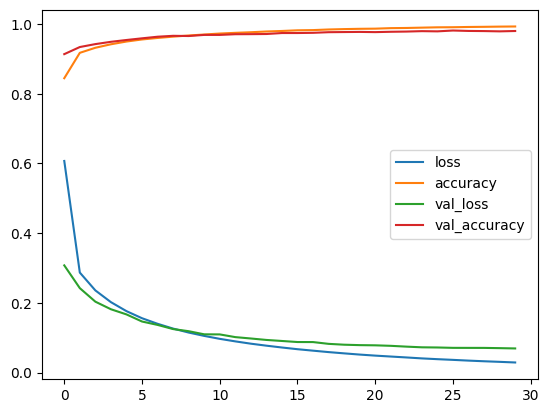

In [27]:
pd.DataFrame(history.history).plot()

In [28]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0714 - accuracy: 0.9778


[0.07142792642116547, 0.9778000116348267]

In [40]:
X_new = X_test[3:6]
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [41]:
actual = y_test[3:6]
actual

array([0, 4, 1], dtype=uint8)

In [42]:
y_pred=model_clf.predict(X_new)
y_pred.round(3)

1/1 [==============================] - 0s 36ms/step


array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.998, 0.   , 0.   , 0.   , 0.   ,
        0.002],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [43]:
y_pred

array([[9.9994230e-01, 5.6809526e-08, 2.8393879e-05, 8.0984456e-08,
        3.6943948e-09, 1.9270685e-07, 2.1909107e-06, 2.4375235e-05,
        7.3569555e-09, 2.4208284e-06],
       [3.8946096e-06, 7.6130709e-07, 1.5171852e-06, 5.9115233e-09,
        9.9802518e-01, 2.7500079e-07, 4.0402829e-06, 2.9191820e-04,
        5.8389123e-06, 1.6666271e-03],
       [7.3626683e-07, 9.9857938e-01, 7.8408502e-06, 2.1238473e-06,
        2.6845784e-05, 6.7729985e-08, 3.6456228e-07, 1.3561122e-03,
        2.2385701e-05, 3.9905781e-06]], dtype=float32)

In [44]:
ypred = np.argmax(y_pred,axis=-1)

In [45]:
ypred

array([0, 4, 1])

In [46]:
actual

array([0, 4, 1], dtype=uint8)

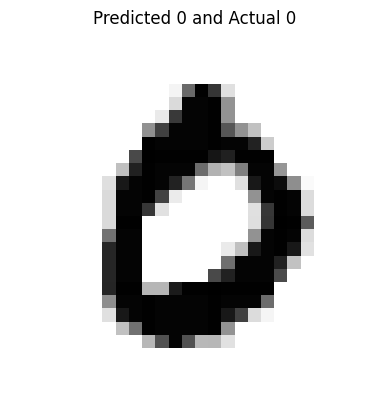

#########################


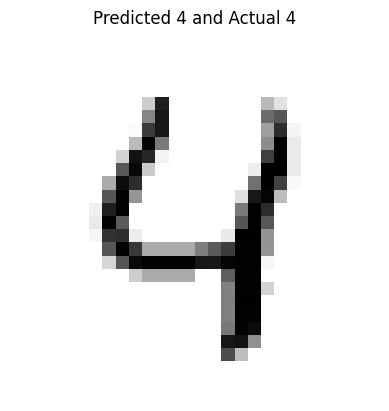

#########################


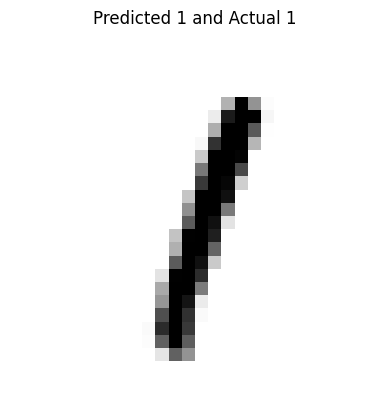

#########################


In [47]:
#plot
for data,pred,actual_data in zip(X_new,ypred,actual):
  plt.imshow(data , cmap='binary')
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis('off')
  plt.show()
  print('#########################')